# DEPRESYON ALT DALLARI (PMDD, DİSTİMİ)

## Veriseti Okuma

In [1]:
import pandas as pd
depresyon = pd.read_csv("depresyon_alt_dallari.csv")
depresyon.head()

,text,Distimi,PMDD,all_labels
0,Beni affetmesini umuyorum.,0,1,['PMDD']
1,Beynim her zaman şöyledir: “WhAt EvEn iS tHis ...,0,1,['PMDD']
2,"Sefaletin bir parçası olmayı öğrendim, ama bun...",0,1,['PMDD']
3,"Umutsuzluk ve çaresizlik, ruhumu kemiriyordu, ...",1,0,['Distimi']
4,Bu hissin geçici olduğunu biliyorum ve bu beni...,0,1,['PMDD']


## Veriseti inceleme

In [6]:
depresyon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27597 entries, 0 to 27596
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        27597 non-null  object
 1   Distimi     27597 non-null  int32 
 2   PMDD        27597 non-null  int32 
 3   all_labels  27597 non-null  object
dtypes: int32(2), object(2)
memory usage: 646.9+ KB


In [7]:
import matplotlib.pyplot as plt

In [5]:
depresyon.shape

(27597, 4)

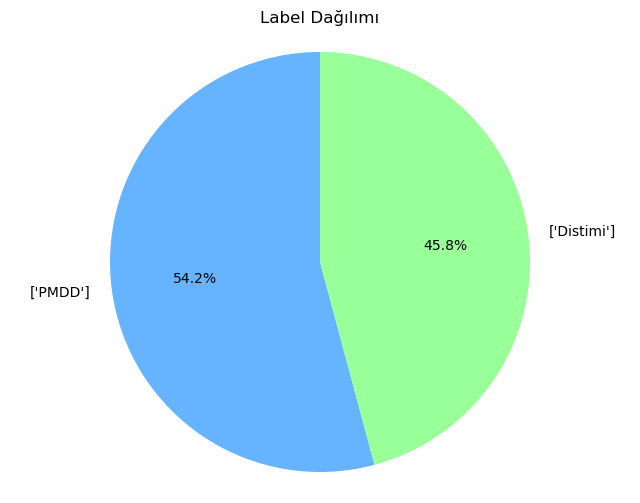

In [8]:
# 'label' kolonundaki dağılımı kontrol etme
label_counts = depresyon['all_labels'].value_counts()

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99', '#ffcc99', '#ff6666', '#ffb3e6', '#c2c2f0', '#ffcc00', '#ff6666'])
plt.title('Label Dağılımı')
plt.axis('equal')  # Eşit orantılı grafik
plt.show()

### Veri Dağılımını Görme

Etiketlerin Dağılımı:
all_labels
[PMDD]       14952
[Distimi]    12645
Name: count, dtype: int64


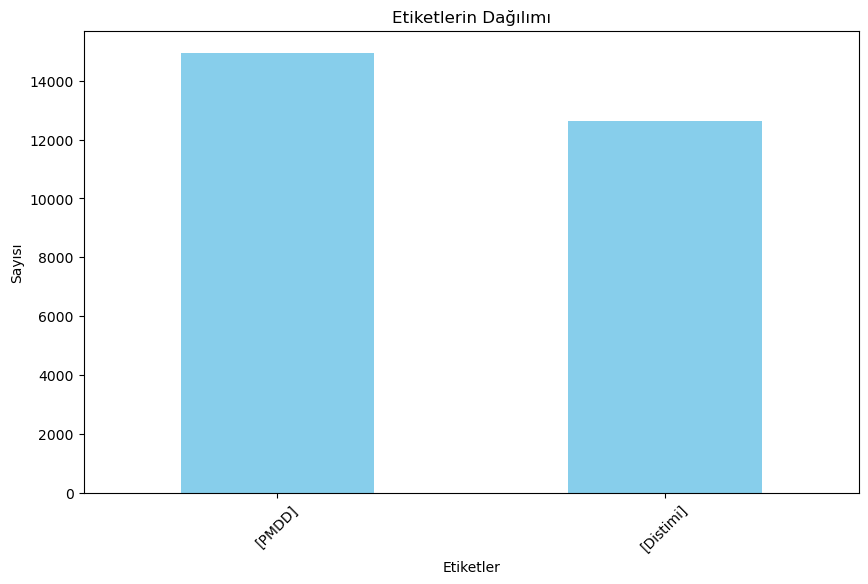

In [9]:
# 'label' sütunundaki etiketlerin sayısını alma
label_counts = depresyon['all_labels'].value_counts()

# Etiketlerin dağılımını yazdırma
print("Etiketlerin Dağılımı:")
print(label_counts)

# Dağılımı görselleştirme (Bar chart)
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Etiketlerin Dağılımı')
plt.xlabel('Etiketler')
plt.ylabel('Sayısı')
plt.xticks(rotation=45)
plt.show()

# Veri Temizliği ve Ön İşleme

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
import random
import string
import re
import nltk

nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import words
from nltk.tokenize import word_tokenize

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # For multilingual support if needed

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
depresyon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27597 entries, 0 to 27596
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        27597 non-null  object
 1   Distimi     27597 non-null  int32 
 2   PMDD        27597 non-null  int32 
 3   all_labels  27597 non-null  object
dtypes: int32(2), object(2)
memory usage: 646.9+ KB


## Eksik verilerin temizlenmesi

In [12]:
# Eksik verileri kontrol edin
print(depresyon.isnull().sum())

# Eksik verileri kaldırmak ya da doldurmak için:
depresyon = depresyon.dropna()  # Eksik verileri kaldırma (isteğe bağlı)


text          0
Distimi       0
PMDD          0
all_labels    0
dtype: int64


In [13]:
# Eksik verileri kaldırma
depresyon = depresyon.dropna()

# Eksik veri sonrası kontrol
print(depresyon.isnull().sum())

text          0
Distimi       0
PMDD          0
all_labels    0
dtype: int64


## Emojileri Temizleme

In [14]:
import re

def clean_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        u"\U0001F700-\U0001F77F"  # Alchemical Symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols & Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub('', text)


## Regex ile Temizlik (Hashtag, E-posta, Link, Alıntılar)


In [15]:
def regex_processes(text):
    # Hashtagleri temizle
    text = re.sub(r'#\w+', '', text)

    # Alıntıları temizle (Çift tırnak içindeki metin)
    text = re.sub(r'"[^"]*"', '', text)
    
    # E-posta adreslerini temizle
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

    # Linkleri (URL'leri) temizle
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # Yeni satır karakterlerini temizle
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').replace('/n', ' ').replace('/r', ' ').replace('/t', ' ')

    return text


## Noktalama İşaretlerini Temizleme

In [16]:
import string

def clean_puncts(text):
    # Noktalama işaretlerini temizle
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)


## Stopwords (Durum Kelimeleri) Temizliği

In [17]:
import nltk
from nltk.corpus import stopwords

# nltk kütüphanesinin indirilen verileri (stopwords vb.) indir
nltk.download('stopwords')

# Türkçe stopwords listesi
def get_turkish_stopwords():
    stop_words = set(stopwords.words('turkish'))
    return stop_words

# Türkçe metin üzerinden stopword'leri temizleme fonksiyonu
def remove_stopwords(text):
    # Stopwords listesi al
    stop_words = get_turkish_stopwords()

    # Metni kelimelere ayır
    words = text.split()

    # Stopword'leri temizle
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Temizlenmiş kelimeler listesini döndür
    return filtered_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Lemmatizasyon (Kök Hali)

In [26]:
from nltk.stem import WordNetLemmatizer

# Türkçe metin için lemmatizasyon
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    tokens = word_tokenize(text)
    return [wordnet_lemmatizer.lemmatize(word) for word in tokens]  # Kelimeleri kök haline getir

## Genel Metin Temizleme

In [27]:
def clean_text(text):
    # Emojileri temizle
    text = clean_emojis(text)

    # Regex işlemleri (hashtag, e-posta, link vb.)
    text = regex_processes(text)

    # Noktalama işaretlerini temizle
    text = clean_puncts(text)

    # Stopwords temizliği
    filtered_words = remove_stopwords(text)

    # Lemmatizasyon
    lemmatized_tokens = lemmatize(' '.join(filtered_words))

    # Temizlenmiş metni döndür
    return ' '.join(lemmatized_tokens)


In [28]:
# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize text
    words = word_tokenize(text)
    # Convert to lowercase
    # words = [zeyrek.lemmatize(word.lower())[0][1][0] for word in words]

    words = [word.lower() for word in words]
    # Remove stopwords
    stop_words = set(stopwords.words('turkish'))
    words = [word for word in words if word not in stop_words]
    return words

In [33]:
# depresyon veri setindeki text sütununa temizlik işlemi uygula
depresyon['cleaned_text'] = depresyon['text'].apply(clean_text)
depresyon.head()

,text,Distimi,PMDD,all_labels,cleaned_text
0,Beni affetmesini umuyorum.,0,1,[PMDD],Beni affetmesini umuyorum
1,Beynim her zaman şöyledir: “WhAt EvEn iS tHis ...,0,1,[PMDD],Beynim zaman şöyledir “ WhAt EvEn iS tHis PmdD...
2,"Sefaletin bir parçası olmayı öğrendim, ama bun...",0,1,[PMDD],Sefaletin bir parçası olmayı öğrendim bunun be...
3,"Umutsuzluk ve çaresizlik, ruhumu kemiriyordu, ...",1,0,[Distimi],Umutsuzluk çaresizlik ruhumu kemiriyordu kendi...
4,Bu hissin geçici olduğunu biliyorum ve bu beni...,0,1,[PMDD],hissin geçici olduğunu biliyorum beni endişele...


In [34]:
#tekrardan boş verinin olup olmadığına bakalım
# Eksik verileri kontrol edin
print(depresyon.isnull().sum())

text            0
Distimi         0
PMDD            0
all_labels      0
cleaned_text    0
dtype: int64


In [35]:
from collections import Counter

In [36]:
all_words = []
for text in tqdm(depresyon['cleaned_text']):
    words = preprocess_text(text)
    all_words.extend(words)

word_freq = Counter(all_words)
most_common_word = word_freq.most_common(200)

print("Most repetitive word:", most_common_word)
print("Frequency:", most_common_word)


100%|██████████████████████████████████████████████████████████████████████████| 27597/27597 [00:06<00:00, 4180.66it/s]


Most repetitive word: [('bir', 13902), ('hissediyorum', 6261), ('kendimi', 5813), ('beni', 5715), ('kötü', 2622), ('kadar', 2370), ('sadece', 2364), ('olarak', 2154), ('sürekli', 2095), ('hiçbir', 2031), ('gerçekten', 1902), ('zaman', 1740), ('pmdd', 1589), ('var', 1587), ('iyi', 1495), ('benim', 1462), ('olduğunu', 1443), ('gün', 1443), ('bile', 1412), ('sonra', 1386), ('bana', 1351), ('mücadele', 1253), ('ediyorum', 1179), ('zor', 1172), ('istiyorum', 1124), ('önce', 1086), ('yok', 1056), ('son', 1051), ('fazla', 1027), ('aynı', 1003), ('ancak', 985), ('tamamen', 940), ('artık', 922), ('ruh', 881), ('ben', 874), ('duygusal', 862), ('şekilde', 826), ('düşünüyorum', 802), ('geliyor', 797), ('depresyon', 785), ('değil', 783), ('ay', 768), ('boyunca', 724), ('şeyi', 699), ('hissettim', 689), ('ediyor', 685), ('bazen', 673), ('hala', 668), ('yüzden', 666), ('hafta', 665), ('distimi', 665), ('olmak', 659), ('şimdi', 658), ('yalnız', 656), ('yaşıyorum', 652), ('etmek', 641), ('kendime', 640

In [37]:
most_common_word

[('bir', 13902),
 ('hissediyorum', 6261),
 ('kendimi', 5813),
 ('beni', 5715),
 ('kötü', 2622),
 ('kadar', 2370),
 ('sadece', 2364),
 ('olarak', 2154),
 ('sürekli', 2095),
 ('hiçbir', 2031),
 ('gerçekten', 1902),
 ('zaman', 1740),
 ('pmdd', 1589),
 ('var', 1587),
 ('iyi', 1495),
 ('benim', 1462),
 ('olduğunu', 1443),
 ('gün', 1443),
 ('bile', 1412),
 ('sonra', 1386),
 ('bana', 1351),
 ('mücadele', 1253),
 ('ediyorum', 1179),
 ('zor', 1172),
 ('istiyorum', 1124),
 ('önce', 1086),
 ('yok', 1056),
 ('son', 1051),
 ('fazla', 1027),
 ('aynı', 1003),
 ('ancak', 985),
 ('tamamen', 940),
 ('artık', 922),
 ('ruh', 881),
 ('ben', 874),
 ('duygusal', 862),
 ('şekilde', 826),
 ('düşünüyorum', 802),
 ('geliyor', 797),
 ('depresyon', 785),
 ('değil', 783),
 ('ay', 768),
 ('boyunca', 724),
 ('şeyi', 699),
 ('hissettim', 689),
 ('ediyor', 685),
 ('bazen', 673),
 ('hala', 668),
 ('yüzden', 666),
 ('hafta', 665),
 ('distimi', 665),
 ('olmak', 659),
 ('şimdi', 658),
 ('yalnız', 656),
 ('yaşıyorum', 652),

#  Veri Keşfi ve Analizi

## Etiket Dağılımı Analizi

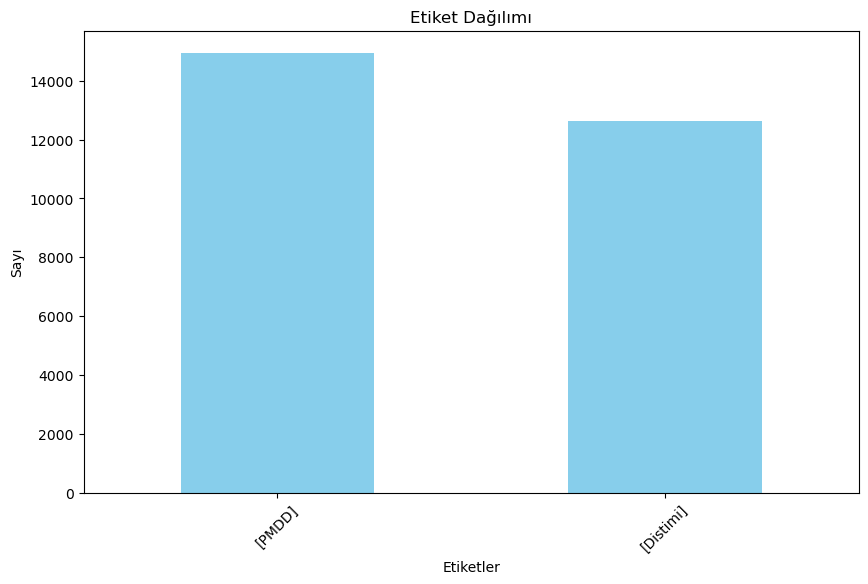

In [39]:

# Etiketlerin dağılımını görselleştirelim
plt.figure(figsize=(10,6))
depresyon['all_labels'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Etiket Dağılımı')
plt.xlabel('Etiketler')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.show()

## Veri setindeki labels içeriğini düzeltme (Object halini silme)

In [45]:
depresyon['all_labels'].dtype

dtype('O')

In [49]:
depresyon['all_labels'] = depresyon['all_labels'].str.strip("[]")
depresyon.head()

,text,Distimi,PMDD,all_labels,cleaned_text
0,Beni affetmesini umuyorum.,0,1,NaN,Beni affetmesini umuyorum
1,Beynim her zaman şöyledir: “WhAt EvEn iS tHis ...,0,1,NaN,Beynim zaman şöyledir “ WhAt EvEn iS tHis PmdD...
2,"Sefaletin bir parçası olmayı öğrendim, ama bun...",0,1,NaN,Sefaletin bir parçası olmayı öğrendim bunun be...
3,"Umutsuzluk ve çaresizlik, ruhumu kemiriyordu, ...",1,0,NaN,Umutsuzluk çaresizlik ruhumu kemiriyordu kendi...
4,Bu hissin geçici olduğunu biliyorum ve bu beni...,0,1,NaN,hissin geçici olduğunu biliyorum beni endişele...


In [50]:
depresyon['all_labels'] = depresyon.apply(
    lambda row: 'PMDD' if row['PMDD'] == 1 else ('Distimi' if row['Distimi'] == 1 else ''),
    axis=1
)
depresyon.head()

,text,Distimi,PMDD,all_labels,cleaned_text
0,Beni affetmesini umuyorum.,0,1,PMDD,Beni affetmesini umuyorum
1,Beynim her zaman şöyledir: “WhAt EvEn iS tHis ...,0,1,PMDD,Beynim zaman şöyledir “ WhAt EvEn iS tHis PmdD...
2,"Sefaletin bir parçası olmayı öğrendim, ama bun...",0,1,PMDD,Sefaletin bir parçası olmayı öğrendim bunun be...
3,"Umutsuzluk ve çaresizlik, ruhumu kemiriyordu, ...",1,0,Distimi,Umutsuzluk çaresizlik ruhumu kemiriyordu kendi...
4,Bu hissin geçici olduğunu biliyorum ve bu beni...,0,1,PMDD,hissin geçici olduğunu biliyorum beni endişele...


## Kelime Bulutları (Word Cloud)

In [40]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


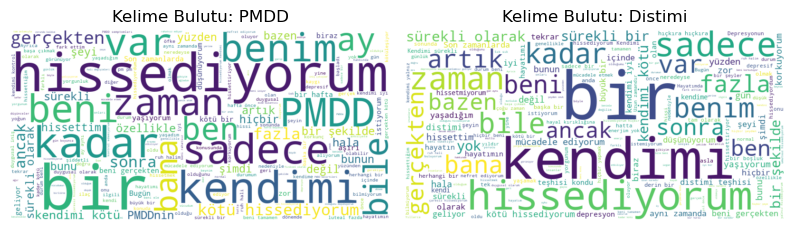

In [51]:
from wordcloud import WordCloud

# Her etikete göre kelime bulutları oluştur
labels = depresyon['all_labels'].unique()

plt.figure(figsize=(12, 10))

for i, label in enumerate(labels, 1):
    plt.subplot(2, 3, i)  # 2 satır, 3 sütunlu bir grid
    subset = depresyon[depresyon['all_labels'] == label]['cleaned_text']
    text = ' '.join(subset)  # Metinleri birleştir
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Kelime Bulutu: {label}')

plt.tight_layout()
plt.show()


## Anahtar Kelime Tespiti

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vektörleştiriciyi başlat
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)

# Her etiket için anahtar kelimeleri belirleyelim
for label in labels:
    subset = depresyon[depresyon['all_labels'] == label]['cleaned_text']
    X = vectorizer.fit_transform(subset)
    
    # Anahtar kelimeleri yazdıralım
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = X.sum(axis=0).A1  # TF-IDF skorlarını al
    word_scores = dict(zip(feature_names, tfidf_scores))
    
    print(f'\nAnahtar Kelimeler - {label}:')
    sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:10]:  # En yüksek 10 kelimeyi yazdır
        print(f'{word}: {score:.4f}')


Anahtar Kelimeler - PMDD:
bir: 3610.2615
beni: 1869.5299
hissediyorum: 1755.5746
kendimi: 1623.0761
pmdd: 1226.8397
kötü: 950.7837
kadar: 929.5463
olarak: 730.1790
gerçekten: 715.5079
sadece: 685.0416

Anahtar Kelimeler - Distimi:
bir: 3567.8266
beni: 1891.6183
kendimi: 1821.2025
hissediyorum: 1798.2011
hiçbir: 914.1232
sadece: 830.0111
sürekli: 769.2739
kötü: 713.5852
olarak: 703.8968
zaman: 665.2977


## Temizlenmiş Verileri csv olarak Kaydetme

In [53]:
# CSV olarak kaydetme
depresyon.to_csv("depresyon_temizlenmis_alt_dallari.csv", index=False)

print("Veri başarıyla 'depresyon_temizlenmis_alt_dallari.csv' dosyasına kaydedildi.")

Veri başarıyla 'depresyon_temizlenmis_alt_dallari.csv' dosyasına kaydedildi.
